<a href="https://colab.research.google.com/github/RedDevilMRK/MLA2021/blob/main/Maitreya_Khanapurkar_20A1HP035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering- Titanic Data**

To remove the warning messages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/RedDevilMRK/PYTHON/main/titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To remove the variables from the dataset

In [5]:
data1 = data.drop('Name', axis=1)
data2= data1.drop('PassengerId', axis=1)
data3= data2.drop('Ticket',axis=1)
data4= data3.drop('Cabin',axis=1)
data5= data4.drop('Embarked',axis=1)

In [6]:
data5.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


to convert the caterical data into numetical using 
**LabelEncoder**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(data5.iloc[:, 2])
print(encoded_sex)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [9]:
data5['Sex'] = encoded_sex

In [10]:
data5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [11]:
data6= data5.fillna(0)

# **Normalizing the features**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform( data6[['Sex', 
                                                              'Fare','Age', 
                                                'Survived', 
                                                'Pclass','SibSp']] )

In [13]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 4, random_state=42 )
clusters_new.fit( scaled_data )
data6["clusterid_new"] = clusters_new.labels_

In [14]:
data6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,0.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,2


# **Finding Optimal Number of Clusters using Elbow Method**

In [15]:
import matplotlib.pyplot as plt

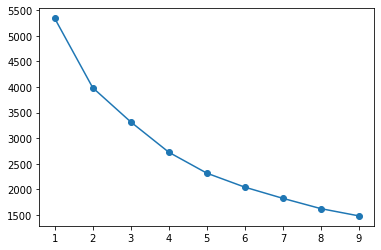

In [16]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_data )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [17]:
  k = 6
  clusters = KMeans( k, random_state = 42 )
  clusters.fit( scaled_data )
  data6["clusterid"] = clusters.labels_

In [18]:
data6[data6.clusterid == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
0,0,3,1,22.0,1,0,7.2500,0,0
4,0,3,1,35.0,0,0,8.0500,0,0
5,0,3,1,0.0,0,0,8.4583,0,0
12,0,3,1,20.0,0,0,8.0500,0,0
13,0,3,1,39.0,1,5,31.2750,0,0
...,...,...,...,...,...,...,...,...,...
882,0,3,0,22.0,0,0,10.5167,0,0
884,0,3,1,25.0,0,0,7.0500,0,0
885,0,3,0,39.0,0,5,29.1250,0,0
888,0,3,0,0.0,1,2,23.4500,0,0


In [19]:
data6[data6.clusterid == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
27,0,1,1,19.00,3,2,263.0000,2,1
88,1,1,0,23.00,3,2,263.0000,2,1
118,0,1,1,24.00,0,1,247.5208,2,1
258,1,1,0,35.00,0,0,512.3292,2,1
297,0,1,0,2.00,1,2,151.5500,2,1
299,1,1,0,50.00,0,1,247.5208,2,1
305,1,1,1,0.92,1,2,151.5500,2,1
311,1,1,0,18.00,2,2,262.3750,2,1
318,1,1,0,31.00,0,2,164.8667,2,1
341,1,1,0,24.00,3,2,263.0000,2,1


In [20]:
data6[data6.clusterid == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
1,1,1,0,38.0,1,0,71.2833,2,2
3,1,1,0,35.0,1,0,53.1000,2,2
9,1,2,0,14.0,1,0,30.0708,1,2
11,1,1,0,58.0,0,0,26.5500,2,2
15,1,2,0,55.0,0,0,16.0000,1,2
...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,2,2
874,1,2,0,28.0,1,0,24.0000,1,2
879,1,1,0,56.0,0,1,83.1583,2,2
880,1,2,0,25.0,0,1,26.0000,1,2


In [21]:
data6[data6.clusterid == 3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
6,0,1,1,54.0,0,0,51.8625,2,3
20,0,2,1,35.0,0,0,26.0000,0,3
21,1,2,1,34.0,0,0,13.0000,1,3
23,1,1,1,28.0,0,0,35.5000,2,3
30,0,1,1,40.0,0,0,27.7208,2,3
...,...,...,...,...,...,...,...,...,...
867,0,1,1,31.0,0,0,50.4958,2,3
872,0,1,1,33.0,0,0,5.0000,0,3
883,0,2,1,28.0,0,0,10.5000,0,3
886,0,2,1,27.0,0,0,13.0000,0,3


In [22]:
data6[data6.clusterid == 4]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
2,1,3,0,26.0,0,0,7.9250,1,4
8,1,3,0,27.0,0,2,11.1333,1,4
10,1,3,0,4.0,1,1,16.7000,1,4
17,1,2,1,0.0,0,0,13.0000,1,4
19,1,3,0,0.0,0,0,7.2250,1,4
...,...,...,...,...,...,...,...,...,...
839,1,1,1,0.0,0,0,29.7000,1,4
855,1,3,0,18.0,0,1,9.3500,1,4
858,1,3,0,24.0,0,3,19.2583,1,4
869,1,3,1,4.0,1,1,11.1333,1,4


In [23]:
data6[data6.clusterid == 5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
7,0,3,1,2.0,3,1,21.0750,3,5
16,0,3,1,2.0,4,1,29.1250,3,5
24,0,3,0,8.0,3,1,21.0750,3,5
50,0,3,1,7.0,4,1,39.6875,3,5
59,0,3,1,11.0,5,2,46.9000,3,5
63,0,3,1,4.0,3,2,27.9000,3,5
68,1,3,0,17.0,4,2,7.9250,3,5
71,0,3,0,16.0,5,2,46.9000,3,5
119,0,3,0,2.0,4,2,31.2750,3,5
159,0,3,1,0.0,8,2,69.5500,3,5


In [24]:
data6[data6.clusterid == 6]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
